<a href="https://colab.research.google.com/github/EloMleko/YouTube-Comments---Sentiment-Analysis/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [2]:
with open('/content/api', 'r') as file:
  api_key = file.read()
video_id = 'hPi680baunE'
youtube_build = build('youtube', 'v3', developerKey=api_key)

In [3]:
def get_video_comments(youtube, video_id):

  comments_list = []
  next_page_token = None

  while True:
      request = youtube.commentThreads().list(
          part='snippet',
          videoId = video_id,
          order='relevance',
          pageToken = next_page_token,
          maxResults=100)
      response = request.execute()

      for comment in response['items']:
        comments_list_parameters =  {'text': comment['snippet']['topLevelComment']['snippet']['textOriginal'],
                                  'like_count': comment['snippet']['topLevelComment']['snippet']['likeCount'],
                                 'published': comment['snippet']['topLevelComment']['snippet']['publishedAt']
                                }

        comments_list.append(comments_list_parameters)

      if 'nextPageToken' not in response:
        break

      next_page_token = response['nextPageToken']

  return comments_list

In [4]:
comments= get_video_comments(youtube_build, video_id)

### Create dataset

In [5]:
df = pd.DataFrame(comments)

In [6]:
df

,text,like_count,published
0,“Being emotional got the best of him” \nProcee...,116,2023-07-15T01:33:57Z
1,Russian state media is hilarious to watch -- i...,77,2023-07-15T05:50:45Z
2,"""You are a pathetic nobody"" is better then som...",30,2023-07-15T03:52:51Z
3,''Those who can make you believe absurdities c...,50,2023-07-15T01:03:30Z
4,"""Don't interrupt when your enemies are making ...",72,2023-07-15T00:45:03Z
...,...,...,...
165,Many of us claim that Switzerland needs to pic...,0,2023-07-15T08:09:44Z
166,what a joke,0,2023-07-15T08:14:16Z
167,Send atacms NOW,0,2023-07-15T04:28:53Z
168,aaaaahahahahahahaha russia aaaahahaahahahahaha...,0,2023-07-15T07:08:59Z


In [7]:
df = df.sort_values(['like_count'], ascending=False)

In [8]:
df = df.reset_index().rename(columns={'index': 'id'})

Text(0.5, 0, 'Likes')

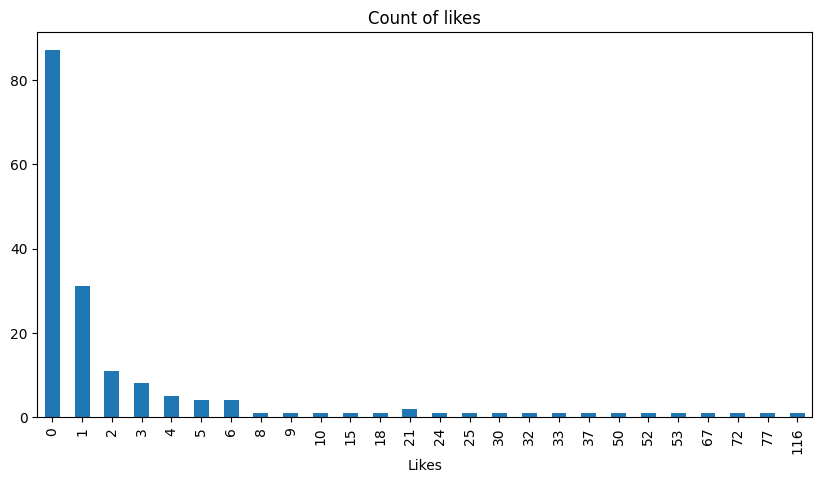

In [10]:
ax = df['like_count'].value_counts().sort_index().plot.bar(title='Count of likes', figsize=(10,5))
ax.set_xlabel('Likes')

In [11]:
example = df['text'][10]

In [12]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['``', 'You', 'are', 'a', 'pathetic', 'nobody', "''", 'is', 'better', 'then']

In [14]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('``', '``'),
 ('You', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('pathetic', 'JJ'),
 ('nobody', 'NN'),
 ("''", "''"),
 ('is', 'VBZ'),
 ('better', 'RBR'),
 ('then', 'RB')]

In [15]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  ``/``
  You/PRP
  are/VBP
  a/DT
  pathetic/JJ
  nobody/NN
  ''/''
  is/VBZ
  better/RBR
  then/RB
  someone/NN
  whoc/NN
  licks/VBZ
  the/DT
  feet/NNS
  of/IN
  a/DT
  tiny/JJ
  dictator/NN
  ./.)


VADER APPROACH

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores('This is awful!')

{'neg': 0.622, 'neu': 0.378, 'pos': 0.0, 'compound': -0.5093}

In [18]:
sia.polarity_scores(example)

{'neg': 0.189, 'neu': 0.663, 'pos': 0.148, 'compound': -0.2023}

# Run the polarity score on the enitre dataset

In [19]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['text']
  res[i] = sia.polarity_scores(text)


  0%|          | 0/170 [00:00<?, ?it/s]

In [20]:
#@title
res

{0: {'neg': 0.34, 'neu': 0.467, 'pos': 0.193, 'compound': -0.6597},
 1: {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.4019},
 2: {'neg': 0.448, 'neu': 0.393, 'pos': 0.16, 'compound': -0.5667},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.198, 'neu': 0.517, 'pos': 0.284, 'compound': 0.7678},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.3612},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.189, 'neu': 0.663, 'pos': 0.148, 'compound': -0.2023},
 11: {'neg': 0.331, 'neu': 0.554, 'pos': 0.115, 'compound': -0.6868},
 12: {'neg': 0.203, 'neu': 0.507, 'pos': 0.29, 'compound': 0.4062},
 13: {'neg': 0.167, 'neu': 0.738, 'pos': 0.095, 'compound': -0.6789},
 14: {'neg': 0.244, 'neu': 0.756, 'pos': 0.0, 'compound': -0.6705},
 15: {'neg': 0.0,

In [21]:
vaders = pd.DataFrame(res).T

In [22]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

In [23]:
merged_df = pd.merge(df, vaders, left_on='id', right_on='Id')

In [24]:
merged_df

,id,text,like_count,published,Id,neg,neu,pos,compound
0,0,“Being emotional got the best of him” \nProcee...,116,2023-07-15T01:33:57Z,0,0.340,0.467,0.193,-0.6597
1,1,Russian state media is hilarious to watch -- i...,77,2023-07-15T05:50:45Z,1,0.000,0.876,0.124,0.4019
2,4,"""Don't interrupt when your enemies are making ...",72,2023-07-15T00:45:03Z,4,0.198,0.517,0.284,0.7678
3,5,Mercenaries training a professional army. Now ...,67,2023-07-15T00:54:04Z,5,0.000,1.000,0.000,0.0000
4,48,NATO is stronger than it has EVER been! Sweden...,53,2023-07-15T00:46:42Z,48,0.000,0.847,0.153,0.5859
...,...,...,...,...,...,...,...,...,...
165,107,🇨🇭🇷🇺❤️🤑,0,2023-07-15T06:29:50Z,107,0.000,0.312,0.688,0.2960
166,106,How do you know Putin is not a strong man?,0,2023-07-15T10:31:27Z,106,0.000,1.000,0.000,0.0000
167,105,"Cool, Wagner training Belarussians how to over...",0,2023-07-15T11:41:21Z,105,0.000,1.000,0.000,0.0000
168,104,"I love the pseudo military ""uniform"" lol Fox ""...",0,2023-07-15T02:43:53Z,104,0.000,0.734,0.266,0.4404


Roberta Pretrained Model

In [25]:
!pip install transformers